<title>How to write uncompressed video and images with opencv and python.</title>
<h1>How to write uncompressed video and uncompressed images with opencv and python.</h1>
<h1>How to write raw video and raw images with opencv and python.</h1>

In [1]:
__author__ = "gelezko@gmail.com"

%matplotlib inline

import cv2
import numpy as np
import time
import datetime
import os
import operator
import matplotlib.pyplot as plt

In [2]:
print "cv2 version: " + cv2.__version__
print "np version: " + np.__version__

cv2 version: 3.1.0
np version: 1.12.0b1


<b>Check all supported(installed) codecs in your device</b>

First of all, I get the idea and list of codecs from https://github.com/wheeler-microfluidics/opencv_helpers/blob/master/opencv_helpers/codec.py

In [3]:
codec_list1 = [
             u'3IV1',u'3IV2',u'8BPS',u'AASC',u'ABYR',u'ADV1',u'ADVJ',u'AEMI',u'AFLI',u'AFLC',u'AJPG',u'AMPG',u'ANIM',
             u'AP41',u'ASLC',u'ASV1',u'ASV2',u'ASVX',u'AUR2',u'AURA',u'avc1',u'AVRn',u'BA81',u'BINK',u'BLZ0',u'BT20',
             u'BTCV',u'BW10',u'BYR1', u'BYR2',u'CC12',u'CDVC',u'CFCC',u'CGDI',u'CHAM',u'CMYK',u'CJPG',u'CPLA',u'CRAM',
             u'CSCD',u'CTRX',u'CVID',u'CWLT',u'CXY1',u'CXY2',u'CYUV',u'CYUY',u'D261',u'D263',u'davc',u'DCL1',u'DCL2',
             u'DCL3',u'DCL4',u'DCL5',u'DIV3',u'DIV4',u'DIV5',u'DIVX',u'divx',u'DM4V',u'dmb1',u'DMB2',u'DMK2',u'DSVD',
             u'DUCK',u'dv25',u'dv50',u'DVAN',u'DVCS',u'DVE2',u'dvh1',u'dvhd',u'dvsd',u'DVSD',u'dvsl',u'DVX1',u'DVX2',
             u'DVX3',u'DX50',u'DXGM',u'DXTn',u'DXTC',u'ELK0',u'EKQ0',u'EM2V',u'ES07',u'ESCP',u'ETV1',u'ETV2',u'ETVC',
             u'FFV1',u'FLJP',u'FMP4',u'FMVC',u'FPS1',u'FRWA',u'FRWD',u'FVF1',u'GEOX',u'GJPG',u'GLZW',u'GPEG',u'GWLT',
             u'H260 throughH269',u'HDYC',u'HFYU',u'HMCR',u'HMRR',u'i263',u'IAN',u'ICLB',u'IGOR',u'IJPG',u'ILVC',u'ILVR',
             u'IPDV',u'IR21',u'IRAW',u'ISME',u'IV30 throughIV39' ,u'IV32',u'IV40 throughIV49',u'IV50',u'JBYR',u'jpeg',
             u'JPEG',u'JPGL',u'KMVC',u'L261',u'L263',u'LBYR',u'LCMW',u'LCW2',u'LEAD',u'LGRY',u'LJ11',u'LJ22',u'LJ2K',
             u'LJ44',u'Ljpg',u'LMP2',u'LMP4',u'LSVC',u'LSVM',u'LSVX',u'LZO1',u'M263',u'M261',u'M4CCm4cc',u'M4S2',u'MC12',
             u'MCAM',u'MJ2C',u'mJPG',u'MJPG',u'MMES',u'MP2A',u'MP2T',u'MP2V',u'MP42',u'MP43',u'MP4A',u'MP4S',u'MP4T',
             u'mp4v',u'MP4V',u'MPEG',u'MPG4',u'MPGI',u'MR16',u'MRCA',u'MRLE',u'MSVC',u'MSZH',u'MTX1throughMTX9',u'MVI1',
             u'MVI2',u'MWV1',u'nAVI',u'NDSC',u'ndsm',u'ndsp',u'NDSP',u'ndss',u'NDSS',u'NDXC',u'NDXH',u'NDXP',u'NDXS',
             u'NTN1',u'NTN2',u'NVDS',u'NVHS',u'NHVU',u'NVS0-NVS5',u'NVT0-NVT5',u'PDVC',u'PGVV',u'PHMO',u'PIM1',u'PIM2',
             u'pimj',u'PIXL',u'PJPG',u'PVEZ',u'PVMM',u'PVW2',u'qpeq',u'QPEG',u'raw',u'RGBT',u'rle',u'RLE',u'RLE4',
             u'RLE8',u'RMP4',u'RPZA',u'RT21',u'rv20',u'rv30',u'RV40',u'RVX',u's422',u'SAN3',u'SDCC',u'SEDG',u'SFMC',
             u'SMC',u'SMP4',u'SMSC',u'SMSD',u'smsv',u'SP40',u'SP44',u'SP54',u'SPIG',u'SQZ2',u'SV10',u'STVA',u'STVB',
             u'STVC',u'STVX',u'STVY',u'SVQ1',u'SVQ3',u'TLMS',u'TLST',u'TM20',u'TM2X',u'TMIC',u'TMOT',u'TR20',u'TSCC',
             u'TV10',u'TVJP',u'TVMJ',u'TY2C',u'TY2N',u'TY0N',u'UCOD',u'ULTI',u'v210',u'V261',u'V655',u'VCR1',u'VCR2',
             u'VCR3-9',u'VDCT',u'VDOM',u'VDOW',u'VDTZ',u'VGPX',u'VIFP',u'VIDS',u'VIVO',u'VIXL',u'VLV1',u'VP30',u'VP31',
             u'VP40',u'VP50',u'VP60',u'VP61',u'VP62',u'VQC1',u'VQC2',u'VQJC',u'vssv',u'VUUU',u'VX1K',u'VX2K',u'VXSP',
             u'VYU9',u'VYUY',u'WBVC',u'WHAM',u'WINX',u'WJPG',u'WMV1',u'WMV2',u'WMV3',u'WMVA',u'WNV1',u'WVC1',u'x263',
             u'X264',u'XVID',u'XLV0',u'XMPG',u'XWV0-XWV9',u'XXAN',u'Y16',u'Y411',u'Y41P',u'Y444',u'Y8',u'YC12',u'YUV8',
             u'YUV9',u'YUVP',u'YUY2',u'YUYV',u'YV12',u'YV16',u'YV92',u'ZLIB',u'ZMBV',u'ZPEG',u'ZyGo',u'ZYYY'
             ]

Then add to it the full list filled according to recomendation from opencv code https://github.com/opencv/opencv/blob/master/modules/videoio/include/opencv2/videoio/videoio_c.h from this http://www.fourcc.org/codecs.php 

In [4]:
codec_list2 = [
             u'1978',u'2VUY',u'3IV0',u'3IV1',u'3IV2',u'3IVD',u'3IVX',u'8BPS',u'AAS4',u'AASC',u'ABYR',u'ACTL',u'ADV1',
             u'ADVJ',u'AEIK',u'AEMI',u'AFLC',u'AFLI',u'AHDV',u'AJPG',u'AMPG',u'ANIM',u'AP41',u'AP42',u'ASLC',u'ASV1',
             u'ASV2',u'ASVX',u'ATM4',u'AUR2',u'AURA',u'AVC1',u'AVRN',u'BA81',u'BINK',u'BLZ0',u'BT20',u'BTCV',u'BW10',
             u'BYR1',u'BYR2',u'CC12',u'CDVC',u'CFCC',u'CGDI',u'CHAM',u'CJPG',u'CMYK',u'CPLA',u'CRAM',u'CSCD',u'CTRX',
             u'CVID',u'CWLT',u'CXY1',u'CXY2',u'CYUV',u'CYUY',u'D261',u'D263',u'DAVC',u'DCL1',u'DCL2',u'DCL3',u'DCL4',
             u'DCL5',u'DIV3',u'DIV4',u'DIV5',u'DIVX',u'DM4V',u'DMB1',u'DMB2',u'DMK2',u'DSVD',u'DUCK',u'DV25',u'DV50',
             u'DVAN',u'DVCS',u'DVE2',u'DVH1',u'DVHD',u'DVSD',u'DVSL',u'DVX1',u'DVX2',u'DVX3',u'DX50',u'DXGM',u'DXTC',
             u'DXTN',u'EKQ0',u'ELK0',u'EM2V',u'ES07',u'ESCP',u'ETV1',u'ETV2',u'ETVC',u'FFV1',u'FLJP',u'FMP4',u'FMVC',
             u'FPS1',u'FRWA',u'FRWD',u'FVF1',u'GEOX',u'GJPG',u'GLZW',u'GPEG',u'GWLT',u'H260',u'HDYC',u'HEVC',u'HFYU',
             u'HMCR',u'HMRR',u'I263',u'ICLB',u'IGOR',u'IJLV',u'IJPG',u'ILVC',u'ILVR',u'IPDV',u'IPMA',u'IR21',u'IRAW',
             u'ISME',u'IV30',u'IV32',u'IV40',u'IV50',u'JBYR',u'JPEG',u'JPGL',u'KB2A',u'KMVC',u'L261',u'L263',u'LBYR',
             u'LCMW',u'LCW2',u'LEAD',u'LGRY',u'LJ11',u'LJ22',u'LJ2K',u'LJ44',u'LJPG',u'LMP2',u'LMP4',u'LSVC',u'LSVM',
             u'LSVX',u'LZO1',u'M261',u'M263',u'M4CC',u'M4S2',u'MC12',u'MCAM',u'MJ2C',u'MJPG',u'MMES',u'MP2A',u'MP2T',
             u'MP2V',u'MP42',u'MP43',u'MP4A',u'MP4S',u'MP4T',u'MP4V',u'MPEG',u'MPG4',u'MPGI',u'MR16',u'MRCA',u'MRLE',
             u'MSVC',u'MSZH',u'MTX1',u'MVI1',u'MVI2',u'MWV1',u'NAVI',u'NDSC',u'NDSM',u'NDSP',u'NDSS',u'NDXC',u'NDXH',
             u'NDXP',u'NDXS',u'NHVU',u'NI24',u'NTN1',u'NTN2',u'NVDS',u'NVHS',u'NVS0',u'NVT0',u'PDVC',u'PGVV',u'PHMO',
             u'PIM1',u'PIM2',u'PIMJ',u'PIXL',u'PJPG',u'PVEZ',u'PVMM',u'PVW2',u'QPEG',u'QPEQ',u'RGBT',u'RLE',u'RLE4',
             u'RLE8',u'RMP4',u'RPZA',u'RT21',u'RV20',u'RV30',u'RV40',u'S422',u'SAN3',u'SDCC',u'SEDG',u'SFMC',u'SMK2',
             u'SMKA',u'SMP4',u'SMSC',u'SMSD',u'SMSV',u'SP40',u'SP44',u'SP54',u'SPIG',u'SQZ2',u'STVA',u'STVB',u'STVC',
             u'STVX',u'STVY',u'SV10',u'SVQ1',u'SVQ3',u'TLMS',u'TLST',u'TM20',u'TM2X',u'TMIC',u'TMOT',u'TR20',u'TSCC',
             u'TV10',u'TVJP',u'TVMJ',u'TY0N',u'TY2C',u'TY2N',u'UCOD',u'ULTI',u'V210',u'V261',u'V655',u'VCR1',u'VCR2',
             u'VCR3',u'VDCT',u'VDOM',u'VDOW',u'VDTZ',u'VGPX',u'VIDS',u'VIFP',u'VIVO',u'VIXL',u'VLV1',u'VP30',u'VP31',
             u'VP40',u'VP50',u'VP60',u'VP61',u'VP62',u'VP70',u'VP80',u'VQC1',u'VQC2',u'VQJC',u'VSSV',u'VUUU',u'VX1K',
             u'VX2K',u'VXSP',u'VYU9',u'VYUY',u'WBVC',u'WHAM',u'WINX',u'WJPG',u'WMV1',u'WMV2',u'WMV3',u'WMVA',u'WNV1',
             u'WVC1',u'X263',u'X264',u'XLV0',u'XMPG',u'XVID',u'XWV0',u'XXAN',u'Y16',u'Y411',u'Y41P',u'Y444',u'Y8',
             u'YC12',u'YUV8',u'YUV9',u'YUVP',u'YUY2',u'YUYV',u'YV12',u'YV16',u'YV92',u'ZLIB',u'ZMBV',u'ZPEG',u'ZYGO',
             u'ZYYY'
             ]

and this http://www.mp4ra.org/codecs.html links.

In [5]:
codec_list3 = [
             u'3gvo',u'a3ds',u'ac-3',u'ac-4',u'alac',u'alaw',u'avc1',u'avc2',u'avc3',u'avc4',u'avcp',u'dra1',u'drac',
             u'dts+',u'dts-',u'dtsc',u'dtse',u'dtsh',u'dtsl',u'dtsx',u'dvav',u'dvhe',u'ec-3',u'enca',u'encf',u'encm',
             u'encs',u'enct',u'encv',u'fdp$20',u'g719',u'g726',u'hev1',u'hvc1',u'ixse',u'm2ts',u'm4ae',u'm4ae',u'mett',
             u'metx',u'mha1',u'mha2',u'mhm1',u'mhm2',u'mjp2',u'mlix',u'mlpa',u'mp4a',u'mp4s',u'mp4v',u'mvc1',u'mvc2',
             u'mvc3',u'mvc4',u'oksd',u'Opus',u'pm2t',u'prtp',u'raw$20',u'resv',u'rm2t',u'rrtp',u'rsrp',u'rtmd',
             u'rtp$20',u's263',u'samr',u'sawb',u'sawp',u'sevc',u'sm2t',u'sqcp',u'srtp',u'ssmv',u'STGS',u'stpp',u'svc1',
             u'svc2',u'svcM',u'tc64',u'tmcd',u'twos',u'tx3g',u'ulaw',u'unid',u'urim',u'vc-1',u'vp08',u'vp09',u'wvtt'
    ]

and from google.com

In [6]:
codec_list4 = [
             u'DIB ',u'IYUV',u'YUV1',u'U263',u'FLV1',u'H264',u'AYUV',u'IUYV',u'THEO',u'I420',u'RGB ',u'RGB1',u'PIMj',
             u'RAW ',u'raw ',u'RGBA',u'LAGS',u'FFDS',
#             -1
    ]

<b>Get full codec list</b>

In [7]:
full_codec_list = []
full_codec_list.extend(codec_list1)
full_codec_list.extend(codec_list2)
full_codec_list.extend(codec_list3)
full_codec_list.extend(codec_list4)
print "length before distinct: " + str(len(full_codec_list))
full_codec_list = list(set(full_codec_list))
print "length after distinct: " + str(len(full_codec_list))
# print full_codec_list

length before distinct: 778
length after distinct: 489


<b>Get frame</b>

I am strongly recommend to use the webcam for this

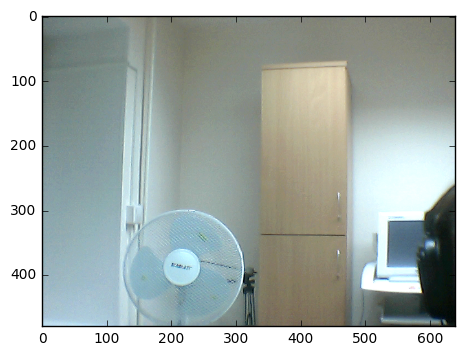

In [8]:
camid = 0
cam = cv2.VideoCapture(camid)
_, frame = cam.read()
cam.release()
if frame is None:
    print "error! frame is None!"
else:
    plt.figure()
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.show()

But if you do not have webcam, please use only uncompressed images like png

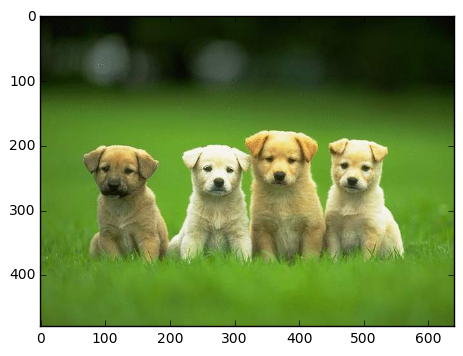

In [8]:
# frame_path = "C:/Users/user/Downloads/dogs.png"
# frame = cv2.imread(frame_path,-1)
# plt.figure()
# plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
# plt.show()

<b>Videos check</b>

In [9]:
#that is not full list of containers, only which I know.
video_containers = [".avi",".mp4",".mpg",".wmv",".mkv"]

In [10]:
outfolder_path = "videos"
os.mkdir(outfolder_path)
fps = 30

for codec in full_codec_list:
    try:
        if type(codec) is str or type(codec) is unicode:
            ##for opencv 2.x.x
#             fourcc = cv2.cv.CV_FOURCC(*str(codec))
            ##for opencv 3.x.x
            fourcc = cv2.VideoWriter_fourcc(*str(codec))
        else:
            fourcc = codec
        for container in video_containers:
            out = cv2.VideoWriter(outfolder_path + "/" + str(codec) + container, fourcc, fps, (640, 480))
            try:
                out.write(frame)
            except:
                print "cannot write frame to "+ str(codec)
            finally:
                out.release()
    except:
        print "error to create codec " + str(codec)
print "finished"

error to create codec Y16
error to create codec M4CCm4cc
error to create codec fdp$20
error to create codec SMC
error to create codec RLE
error to create codec MTX1throughMTX9
error to create codec Y8
error to create codec H260 throughH269
error to create codec rle
error to create codec NVS0-NVS5
error to create codec VCR3-9
error to create codec raw
error to create codec IAN
error to create codec XWV0-XWV9
error to create codec NVT0-NVT5
error to create codec rtp$20
error to create codec IV30 throughIV39
error to create codec raw$20
error to create codec RVX
error to create codec IV40 throughIV49
finished


Check all video files and first frame on it

In [11]:
def compare_frames(f1, f2):
    if f1 is None or f2 is None:
        # we dont know
        return
    if len(f1.shape) != len(f2.shape):
        return False
    
    for idx in xrange(len(f1.shape)):
        if f1.shape[idx] != f2.shape[idx]:
            return False
        
    res = np.array(cv2.subtract(f1, f2))
    if np.count_nonzero(res) != 0 :
        return False
    return True

In [12]:
#all files in folder is video
raw_videos = {}
for vid_path in os.listdir(outfolder_path + "/"):
    cap = cv2.VideoCapture(outfolder_path + "/" + vid_path)
    statinfo = os.stat(outfolder_path + "/" + vid_path)
    _,img = cap.read()
    if img is not None:
        f1 = frame.copy()
        f2 = img.copy()
        if compare_frames(f1,f2):
            raw_videos[vid_path] = statinfo.st_size
    cap.release()
raw_videos_sorted = sorted(raw_videos.items(), key=operator.itemgetter(1))
for r in raw_videos_sorted:
    print r

('LAGS.avi', 319488L)
('DIB .avi', 926208L)


Remove all video files

In [13]:
for vid_path in os.listdir(outfolder_path + "/"):
    os.remove(outfolder_path + "/" + vid_path )
os.rmdir(outfolder_path)

<b>Images check</b>

Supported images formats 

In [14]:
images_formats = [
        #from http://docs.opencv.org/2.4/doc/tutorials/introduction/display_image/display_image.html
        ".bmp",".pbm",".pgm",".ppm",".sr",".ras",".jpeg",".jpg",".jpe",".jp2",".tiff",".tif",".png",
        #from http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html
        ".dib",".webp"
    ]

Store images

In [15]:
outfolder_path = "images"
os.mkdir(outfolder_path)
for image_format in images_formats:
    try:
        cv2.imwrite(outfolder_path + "/out" + image_format, frame)
    except:
        print "error with format " + image_format

Check all images files

In [16]:
raw_images = {}
for image_path in os.listdir(outfolder_path + "/"):
    img = cv2.imread(outfolder_path + "/" + image_path)
    statinfo = os.stat(outfolder_path + "/" + image_path)
    if img is not None:
        f1 = frame.copy()
        f2 = img.copy()
        if compare_frames(f1,f2):
            raw_images[image_path] = statinfo.st_size
raw_images_sorted = sorted(raw_images.items(), key=operator.itemgetter(1))
for r in raw_images_sorted:
    print r

('out.webp', 319442L)
('out.jp2', 371340L)
('out.png', 463102L)
('out.tiff', 480764L)
('out.tif', 480764L)
('out.pbm', 921615L)
('out.ppm', 921615L)
('out.pgm', 921615L)
('out.sr', 921632L)
('out.ras', 921632L)
('out.dib', 921654L)
('out.bmp', 921654L)


Remove all images

In [17]:
for image_path in os.listdir(outfolder_path + "/"):
    os.remove(outfolder_path + "/" + image_path )
os.rmdir(outfolder_path)

<b>As you can see my PC support only 2 raw video formats. And 12 image formats. You can choose what you want: images or video. For images, instead of jp2 or webp format I recommend to use the png. Because of it supported by all of image readers and opencv liraries.</b>